In [17]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
CSV_PATH = r"C:\Data_sets\data-60861-2024-08-06.csv"
df_plants = pd.read_csv(CSV_PATH, sep=';', encoding='utf-8', on_bad_lines='skip')

## 1.Посмотрим на структуру нашего датасета.

In [18]:
df_plants

,ID,Name,LatinName,Photo,LandscapingZone,ProsperityPeriod,Description,LocationPlace,ViewForm,global_id,Unnamed: 10
0,Код,Название,Латинское название,Фотография,Ландшафтная зона,Период цветения,Описание,Расположение в парке,Форма осмотра,global_id,NaN
1,1,Ель обыкновенная,Picea abies,ba4bd41f-4301-421c-892b-f9b74da0b8de,Хвойный лес,Май\n,Ботаники выделяют 40 видов елей. Ель обыкновен...,Хвойный лес,Бесплатная,881409012,NaN
2,2,Сосна обыкновенная,Pinus sylvestris,102b0915-249e-4c3b-8912-9e484a56db27,Хвойный лес,Май - июнь\n,В средней полосе России исконно растёт лишь од...,Хвойный лес,Бесплатная,881409317,NaN
3,3,Дуб черешчатый,Querqus robur,b0fd9656-54e1-4169-8255-db196c3b44c6,Смешанный лес,Май - июнь\n,Дуб черешчатый считается визитной карточкой ши...,Смешанный лес,Бесплатная,881409921,NaN
4,4,Липа мелколистная,Tilia cordata,eadb690c-3c4c-4878-9b93-1cc032938807,Смешанный лес,Июль\n,В Европейской части России можно встретить чет...,Смешанный лес,Бесплатная,881410524,NaN
...,...,...,...,...,...,...,...,...,...,...,...
151,153,Клубнекамыш морской,Bolboschoenus maritimus,b164066e-060c-4329-9639-d62e5e53293e,Прибрежный лес,Май - август,Клубнекамыш морской - многолетнее растение с д...,Прибрежный лес,Бесплатная,881603096,NaN
152,154,Сусак зонтичный,Butomus umbellatus,b6e12e01-1de0-4072-b7ec-c7207323a716,Прибрежный лес,Июнь - июль\n,Корневища сусака зонтичного содержат много угл...,Прибрежный лес,Бесплатная,881603146,NaN
153,155,Вахта трехлистная,Menyanthes trifoliata,29ffa680-a510-424b-818f-4d5439e1c338,Прибрежный лес,Май - июнь,"Вахта трехлистная - многолетнее растение, прои...",Прибрежный лес,Бесплатная,881603527,NaN
154,156,Кубышка жёлтая,Nyphar lutea ssp.lutea,b9812189-7207-4c19-af28-72bde3aae596,Прибрежный лес,Июнь - сентябрь\n,"Кубышка близкий родственник кувшинки, ее даже ...",Прибрежный лес,Бесплатная,881603562,NaN


## 2 .Проведем необходимые преобразования и посмотрим количество пустых значений.

In [19]:
# Установка первой строки в качестве заголовка
df_plants.columns = df_plants.iloc[0]  # Установка первой строки в качестве заголовков
df_plants = df_plants[1:]  # Удаление первой строки из данных

# Удаление последней колонки
df_plants = df_plants.iloc[:, :-1]  # Удаление последнего столбца

# Сброс индекса
df_plants.reset_index(drop=True, inplace=True)

df_plants.drop(columns=['Код'], inplace=True) 

# Проверка результата
df_plants.head()

,Название,Латинское название,Фотография,Ландшафтная зона,Период цветения,Описание,Расположение в парке,Форма осмотра,global_id
0,Ель обыкновенная,Picea abies,ba4bd41f-4301-421c-892b-f9b74da0b8de,Хвойный лес,Май\n,Ботаники выделяют 40 видов елей. Ель обыкновен...,Хвойный лес,Бесплатная,881409012
1,Сосна обыкновенная,Pinus sylvestris,102b0915-249e-4c3b-8912-9e484a56db27,Хвойный лес,Май - июнь\n,В средней полосе России исконно растёт лишь од...,Хвойный лес,Бесплатная,881409317
2,Дуб черешчатый,Querqus robur,b0fd9656-54e1-4169-8255-db196c3b44c6,Смешанный лес,Май - июнь\n,Дуб черешчатый считается визитной карточкой ши...,Смешанный лес,Бесплатная,881409921
3,Липа мелколистная,Tilia cordata,eadb690c-3c4c-4878-9b93-1cc032938807,Смешанный лес,Июль\n,В Европейской части России можно встретить чет...,Смешанный лес,Бесплатная,881410524
4,Клён остролистный,Acer platanoides,2f69ee78-ebd3-49d6-89dd-aedb96693589,Смешанный лес,Май\n,В России можно встретить около 20 разных видов...,Смешанный лес,Бесплатная,881411126


In [22]:
df_plants.isna().sum()

0
Название                0
Латинское название      0
Фотография              0
Ландшафтная зона        0
Период цветения         0
Описание                0
Расположение в парке    0
Форма осмотра           0
global_id               0
dtype: int64

**Пустых значений нет.**

## 3. В какой форме производится осмотр растений?

In [21]:
df_plants['Форма осмотра'].value_counts(normalize=True)

Форма осмотра
Бесплатная    1.0
Name: proportion, dtype: float64

**Датасет содержит только растения для бесплатного просмотра. Оранжерейные растения в него не входят.**

## 4. Посмотрим, в каких зонах парка растения наиболее распространены.

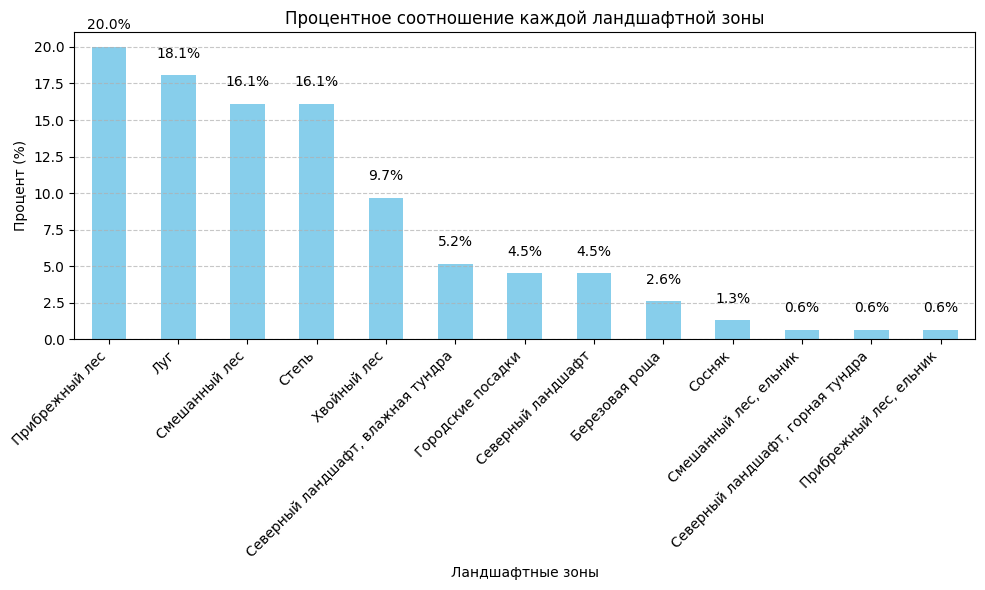

In [26]:
counts = df_plants['Ландшафтная зона'].value_counts(normalize=True) * 100

# Создание гистограммы
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Ландшафтные зоны')
plt.ylabel('Процент (%)')
plt.title('Процентное соотношение каждой ландшафтной зоны')
plt.xticks(rotation=45, ha='right')  # Поворот меток по оси X для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображение процентов над столбцами
for index, value in enumerate(counts):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom')  # Добавление 1 для отступа

plt.tight_layout()
plt.show()


**Больше всего высажено растений в зонах "Прибрежный лес", "Луг" и "Степь". Меньше всего высажено в зоне Северных ландшафтов и горной тундры.**

## 5.Выделим месяцы, когда цветет больше всего растений в парке.

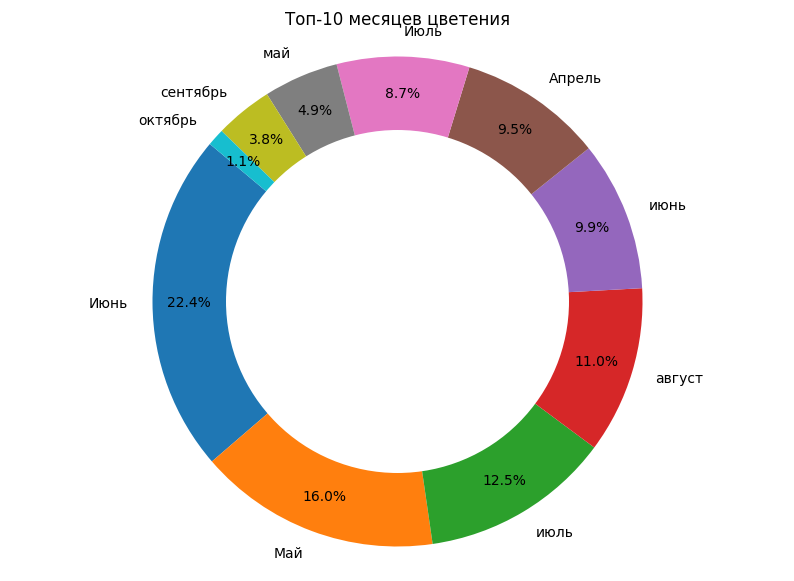

In [28]:
# Разделение строк и подсчет месяцев
months = []

for period in df_plants['Период цветения']:
    # Убираем лишние пробелы и символы новой строки, затем разделяем по ' - '
    periods = period.replace('\n', '').strip().split(' - ')
    months.extend(periods)

# Создание DataFrame для подсчета частоты месяцев
months_df = pd.DataFrame(months, columns=['Month'])
top_months = months_df['Month'].value_counts().head(10)  # Топ-10 месяцев

for period in df_plants['Период цветения']:
    # Убираем лишние пробелы и символы новой строки, затем разделяем по ' - '
    periods = period.replace('\n', '').strip().split(' - ')
    months.extend(periods)

# Создание DataFrame для подсчета частоты месяцев
months_df = pd.DataFrame(months, columns=['Month'])
top_months = months_df['Month'].value_counts().head(10)  # Топ-10 месяцев

# Визуализация результата на пончиковой диаграмме
plt.figure(figsize=(10, 7))
plt.pie(top_months, labels=top_months.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

# Создание "дыры" в центре пончика
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Настройки графика
plt.title('Топ-10 месяцев цветения')
plt.axis('equal')  # Равные оси для корректного отображения круга
plt.show()



**Наибольшее количество растений  в парке "Зарядье" цвете в июне и мае.**

## 6.Посмотрим, сколько в парке растений, которые цветут

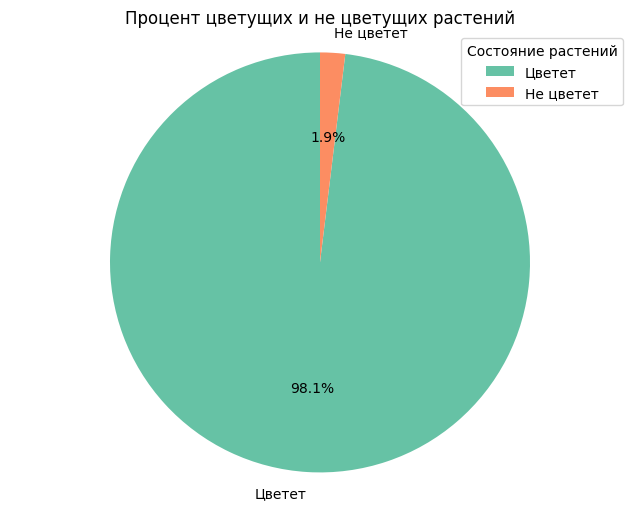

In [5]:
# Подсчет количества цветущих и не цветущих растений
flowering_count = df_plants['ProsperityPeriod'].str.contains('не цветет', case=False).sum()
total_count = len(df_plants)
flowering_plants_count = total_count - flowering_count

# Данные для круговой диаграммы
labels = ['Цветет', 'Не цветет']
sizes = [flowering_plants_count, flowering_count]
colors = ['#66c2a5', '#fc8d62']  # Цвета для сегментов диаграммы

# Визуализация круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Добавление легенды
plt.legend(labels, title="Состояние растений", loc="upper right")
# Настройки графика
plt.title('Процент цветущих и не цветущих растений, высаженных  в парке')
plt.axis('equal')  # Равные оси для корректного отображения круга
plt.show()

## Выводы.
### В датасете содержатся растения только для бесплатного просмотра. Оранжерейные растения в него не входят. Наибольшее количество растений представлено в зонах "Приибрежного леса", "Луга"  и "Степи". Меньше всего растений в зоне "Северных ландшафтов" и "Горной тундры". 95 процентов высаженных в парке растений цветет. Наиболее цветущие месяцы в парке июнь и май.